<a href="https://colab.research.google.com/github/HarshitCodex/Pragyan-Hack/blob/master/SF_dataset_prep(Pragyan_Hack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import os


In [0]:
from fastai import *
from pathlib import Path

In [6]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
!pip install -q kaggle

In [0]:
!kaggle datasets download -d kaggle/san-francisco-crime-classification

 61% 25.0M/41.3M [00:01<00:00, 17.7MB/s]
100% 41.3M/41.3M [00:01<00:00, 30.5MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.rename('/content/san-francisco-crime-classification.zip','/content/drive/My Drive/Pragyan')

OSError: ignored

In [7]:
cd '/content/drive/My Drive/Pragyan'

/content/drive/My Drive/Pragyan


In [0]:
!unzip \*.zip

Archive:  san-francisco-crime-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!pip install fastai==0.7.0 

     |████████████████████████████████| 122kB 9.0MB/s 
     |████████████████████████████████| 496.4MB 28kB/s 
     |████████████████████████████████| 1.5MB 57.7MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2667127 sha256=6f21a32eed26a4d4aeb6ff25f6a113aa25eee6c8dd31b0fb396ff91448be45cc
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_raw = pd.read_csv('train.csv')
df_raw.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [0]:
df_raw['Dates'] = pd.to_datetime(df_raw['Dates'])

In [12]:
df_raw.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [0]:
import datetime

In [0]:
Data = pd.read_csv('train.csv', parse_dates=['Dates'], infer_datetime_format=True)

In [0]:
Data['Date'] = Data.Dates.dt.date
Data['Time'] = Data.Dates.dt.time

In [130]:
Data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00


In [131]:
Data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00


In [0]:
df=Data

In [133]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00


In [0]:
df['Hour']=df['Dates'].dt.hour

In [135]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,23


In [0]:
def f(x):
  if((x>20) and (x<=24)) or ((x>=0) and (x<=6)):
    return 'Night'
  elif(x>6) and (x<=12):
    return 'Morning'
  elif(x>12) and (x<=16):
    return 'Afternoon'
  elif(x>16) and (x<=20):
    return 'Dusk'
    

In [0]:
df['Hour']=pd.to_numeric(df['Hour'])

In [138]:
df.Hour.dtype

dtype('int64')

In [0]:
df['Session']=df['Hour'].apply(f)

In [140]:
df[1000:1010]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Hour,Session
1000,2015-05-11 11:00:00,LARCENY/THEFT,THEFT OF CHECKS OR CREDIT CARDS,Monday,SOUTHERN,NONE,0 Block of HOWARD ST,-122.392134,37.791697,2015-05-11,11:00:00,11,Morning
1001,2015-05-11 11:00:00,OTHER OFFENSES,FALSE PERSONATION,Monday,MISSION,NONE,400 Block of DOLORES ST,-122.426341,37.762579,2015-05-11,11:00:00,11,Morning
1002,2015-05-11 11:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,CENTRAL,NONE,NORTHPOINT ST / MASON ST,-122.413789,37.806553,2015-05-11,11:00:00,11,Morning
1003,2015-05-11 11:00:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Monday,NORTHERN,NONE,VANNESS AV / TURK ST,-122.420642,37.781961,2015-05-11,11:00:00,11,Morning
1004,2015-05-11 10:47:00,WARRANTS,WARRANT ARREST,Monday,TARAVAL,"ARREST, BOOKED",300 Block of RANDOLPH ST,-122.465757,37.714229,2015-05-11,10:47:00,10,Morning
1005,2015-05-11 10:47:00,WARRANTS,PROBATION SEARCH,Monday,TARAVAL,"ARREST, BOOKED",300 Block of RANDOLPH ST,-122.465757,37.714229,2015-05-11,10:47:00,10,Morning
1006,2015-05-11 10:45:00,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Monday,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,2015-05-11,10:45:00,10,Morning
1007,2015-05-11 10:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,TENDERLOIN,"ARREST, BOOKED",POWELL ST / OFARRELL ST,-122.408040,37.786409,2015-05-11,10:40:00,10,Morning
1008,2015-05-11 10:33:00,OTHER OFFENSES,TRAFFIC VIOLATION,Monday,INGLESIDE,"ARREST, BOOKED",MISSION ST / ROLPH ST,-122.441553,37.715755,2015-05-11,10:33:00,10,Morning
1009,2015-05-11 10:30:00,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Monday,RICHMOND,NONE,400 Block of 6TH AV,-122.464280,37.780033,2015-05-11,10:30:00,10,Morning


In [141]:
df.groupby("PdDistrict")["PdDistrict"].count().sort_values(ascending=False)

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [142]:
df.groupby("DayOfWeek")["DayOfWeek"].count().sort_values(ascending=False)

DayOfWeek
Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [143]:
(df['Category'].value_counts()).tolist()

[174900,
 126182,
 92304,
 76876,
 53971,
 53781,
 44725,
 42214,
 36755,
 31414,
 25989,
 23000,
 16679,
 10609,
 9985,
 8555,
 7484,
 7326,
 4540,
 4388,
 4320,
 4280,
 3138,
 2341,
 2268,
 1946,
 1903,
 1513,
 1225,
 1166,
 508,
 491,
 406,
 289,
 256,
 148,
 146,
 22,
 6]

In [144]:
df.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [0]:
def g(x):
  if (x.lower()=='assault'):
    return 80
  elif (x.lower()=='sex offenses forcible'):
    return 100
  elif (x.lower()=='missing person'):
    return 70
  elif (x.lower()=='kidnapping'):
    return 70
  elif (x.lower()=='extortion'):
    return 60
  elif (x.lower()=='sex offenses non forcible'):
    return 90
  else:
    return random.randrange(10,50,1)

In [0]:
df['Factor']=df['Category'].apply(g)

In [182]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Hour,Session,Factor,Temp
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,Night,14,True
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,23,Night,14,True
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,23,Night,46,None
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,23,Night,32,None
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,23,Night,26,None


In [166]:
pwd

'/content/drive/My Drive/Pragyan'

In [0]:
df.to_csv('Crime_data.csv')

In [184]:
max(df.Factor)

100

In [185]:
df.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [0]:
def h(x):
  if 'PRESIDIO PARKWAY' in x and :
    return True

In [0]:
df['Temp']=df['Address'].apply(h)

In [200]:
df.loc[df.Temp==True and df.Session==time]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Hour,Session,Factor,Temp


In [188]:
df.Address.dtype

dtype('O')

In [0]:
del df['Temp']

In [201]:
df.Category

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 878049, dtype: object

In [204]:
hours=df.groupby('Hour').size()
hours

Hour
0     44865
1     26173
2     22296
3     14014
4      9863
5      8637
6     13133
7     22048
8     32900
9     35555
10    37806
11    38373
12    51934
13    43145
14    44424
15    48058
16    50137
17    53553
18    55104
19    49475
20    44694
21    43661
22    45741
23    42460
dtype: int64

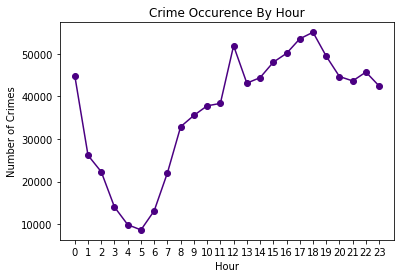

In [205]:
plt.plot(hours.values, 'ro-', color = 'indigo')

plt.xticks(hours.index)
plt.title('Crime Occurence By Hour')
plt.ylabel ('Number of Crimes')
plt.xlabel ('Hour')
plt.show()

In [0]:
train_df=df

In [0]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [209]:
train_df.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [210]:
train_df.columns.values

array(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y'],
      dtype=object)

In [211]:
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [212]:
train_df['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [213]:
train_df[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [214]:
train_df[train_df['Y']==train_df['Y'].max()]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0
...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0


In [0]:
train_df['Y'].replace(to_replace= train_df['Y'].max() ,value=np.nan, inplace=True)
train_df['X'].replace(to_replace= train_df['X'].max() ,value=np.nan, inplace=True)
test_df['Y'].replace(to_replace= test_df['Y'].max() ,value=np.nan, inplace=True)
test_df['X'].replace(to_replace= test_df['X'].max() ,value=np.nan, inplace=True)

In [217]:
train_df.isnull().sum()

Dates          0
Category       0
Descript       0
DayOfWeek      0
PdDistrict     0
Resolution     0
Address        0
X             67
Y             67
dtype: int64

In [218]:
test_df.isnull().sum()

Id             0
Dates          0
DayOfWeek      0
PdDistrict     0
Address        0
X             76
Y             76
dtype: int64

In [0]:
data = [train_df, test_df]

for dataset in data:
    mean_X = dataset["X"].mean()
    std_X = dataset["X"].std()
    mean_Y = dataset["Y"].mean()
    std_Y = dataset["Y"].std()
    max_X = mean_X + std_X
    min_X = mean_X - std_X
    max_Y = mean_Y + std_Y
    min_Y = mean_Y - std_Y
    is_null = dataset['Y'].isnull().sum()
    random_X = (max_X - min_X) * np.random.randn(is_null) + min_X
    random_Y = (max_Y - min_Y) * np.random.randn(is_null) + min_Y

    X_slice = dataset['X'].copy()
    Y_slice = dataset['Y'].copy()
    X_slice[np.isnan(X_slice)] = random_X
    Y_slice[np.isnan(Y_slice)] = random_Y
    dataset['X'] = X_slice
    dataset['Y'] = Y_slice

In [220]:
train_df[['X', 'Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422764,37.767033
std,0.025288,0.024168
min,-122.554872,37.636368
25%,-122.432952,37.752427
50%,-122.416421,37.775421
75%,-122.406959,37.784368
max,-122.329596,37.854269


In [0]:
train_df["Dates"] = pd.to_datetime(train_df["Dates"], format="%Y-%m-%d %H:%M:%S")
test_df["Dates"] = pd.to_datetime(test_df["Dates"], format="%Y-%m-%d %H:%M:%S")

In [0]:
df=pd.read_csv('Crime_data.csv')

In [0]:
val=0

In [0]:
if 'ST' in df.Address.values:
  val=val+df.Factor.values

In [0]:
print(val)

In [24]:
df.columns

Index(['Unnamed: 0', 'Dates', 'Category', 'Descript', 'DayOfWeek',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Date', 'Time', 'Hour',
       'Session', 'Factor', 'Temp'],
      dtype='object')

In [0]:
import pandas as pd
import numpy as np
import json
from fastai import *
import random

In [0]:
def crime(data):
    routes=data["list"]
    sess=f(int(data["time"]))
    val=[]
    i=0
    df=pd.read_csv('Crime_data.csv')
    for lists in routes:
        for x in lists:
            if ('street' in x ):
                res=x.split()
                x=res[0]
            val.append(df.loc[(df['Address'] ==x ) & df['Session'] == sess ,'Factor'].sum()+random.randrange(10,6000))
    presum=sum(val)
    val[:]=[(100-(x*100/presum)) for x in val]
    return json.dumps(val)

In [48]:
data={
    "time":17,
    "list":[["Broderick Street",
"Jackson Street"
, "5THSTNORTH ST / ELLIS ST"
, "Castro Street"
, "20th Street"
, "Guerrero Street"
, "JAMESLICKFREEWAY HY / SILVER AV"],
[ "Broderick Street"
, "Jackson Street"
, "Gough Street"
, "Market Street"
, "Valencia Street"
, "Cesar Chavez Street"],[ "Broderick Street"
, "Jackson Street"
, "Gough Street"
, "Market Street"
, "Valencia Street"
, "Cesar Chavez Street"
]]
}
print(crime(data))

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[92.57244110902647, 94.07337919533042, 98.40108401084011, 99.20575359599749, 96.64373566812591, 94.39649781113195, 90.82343131123619, 95.10944340212633, 92.43068584531999, 98.81384198457368, 90.46070460704607, 89.54971857410882, 94.19220346049615, 93.31665624348551, 90.2439024390244, 98.6262247237857, 99.14738378153012, 99.52678757556806, 92.46612466124661]


In [20]:
cd '/content/drive/My Drive/Pragyan'

/content/drive/My Drive/Pragyan


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
